# Modelo basado en capas convolucionales para clasificación de dígitos

In [32]:
INTEGRANTES:
ABRAHAM JOSE GOMEZ SARMIENTO 
JORGE IVAN CUJIA LOPEZ 
CESAR STIVEN HERNANDEZ FUENTES



SyntaxError: invalid syntax (3282621412.py, line 1)

 Modelo preentrenado (formato .h5):

In [1]:
import requests

url = "https://huggingface.co/spaces/ayaanzaveri/mnist/resolve/main/mnist-model.h5"
r = requests.get(url)
with open("mnist_model.h5", "wb") as f:
    f.write(r.content)

print("Modelo guardado correctamente.")

Modelo guardado correctamente.


Usar el modelo descargado

In [3]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos de prueba
(_, _), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Cargar el modelo preentrenado
model = load_model("mnist_model.h5")

# Carga el modelo con las metricas correctas

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


C:\Users\gomez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\gomez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Realizar una predicción

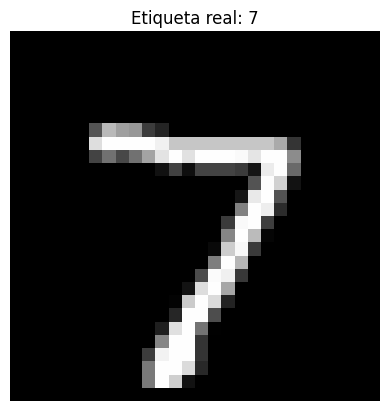

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Predicción del modelo: 7


In [4]:

idx = 0  # Cambia este índice para probar otras imágenes
img = x_test[idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(f"Etiqueta real: {y_test[idx]}")
plt.axis('off')
plt.show()

prediction = model.predict(np.expand_dims(img, axis=0))
print("Predicción del modelo:", np.argmax(prediction))

# Para hacer

1. Mostrar los valores y visualizar al menos 10 kernels del modelo pre-entrenado
2. Mostrar las salidas obtenidas al aplicar la convolución de una imagen con los kernels del ejercicio 1.
3. Calcular las predicciones de al menos 10 imágenes propias (adjuntar evidencia del proceso de adquisición de imágenes). Aplicar y explicar el tratamiento de imágenes necesario para adecuar los datos de entrada al modelo.
4. Repetir el ejercicio 2 con al menos una de las imágenes del ejercicio 3.

Número de kernels: 64


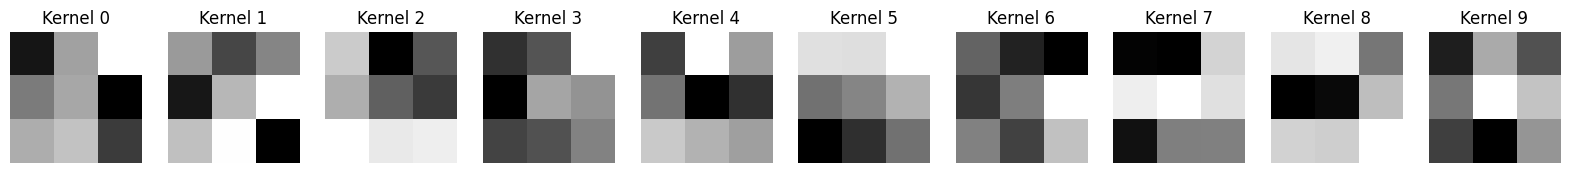

In [19]:
# === PASO 1: Mostrar 10 kernels de la primera capa convolucional ===
first_conv_layer = None
for layer in model.layers:
    if 'conv' in layer.name:
        first_conv_layer = layer
        break

if first_conv_layer:
    kernels, biases = first_conv_layer.get_weights()
    print(f"Número de kernels: {kernels.shape[-1]}")
    fig, axes = plt.subplots(1, 10, figsize=(20, 5))
    for i in range(10):
        kernel = kernels[:, :, 0, i]
        axes[i].imshow(kernel, cmap='gray')
        axes[i].set_title(f'Kernel {i}')
        axes[i].axis('off')
    plt.show()

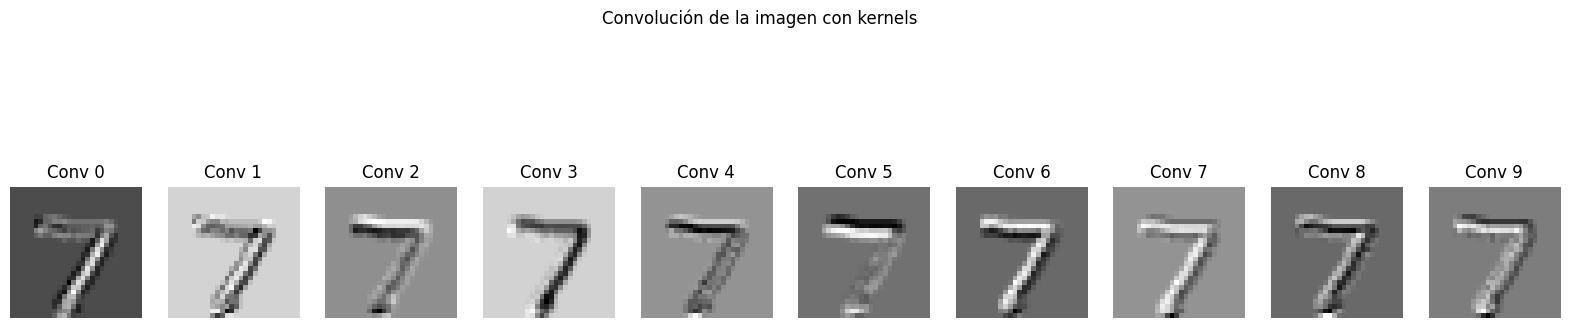

In [20]:
# === PASO 2: Aplicar convolución de una imagen de prueba con esos kernels ===
sample_image = x_test[0]  # Imagen de prueba
fig, axes = plt.subplots(1, 10, figsize=(20, 5))
for i in range(10):
    kernel = kernels[:, :, 0, i]
    output = cv2.filter2D(sample_image[:, :, 0], -1, kernel)
    axes[i].imshow(output, cmap='gray')
    axes[i].set_title(f'Conv {i}')
    axes[i].axis('off')
plt.suptitle("Convolución de la imagen con kernels")
plt.show()

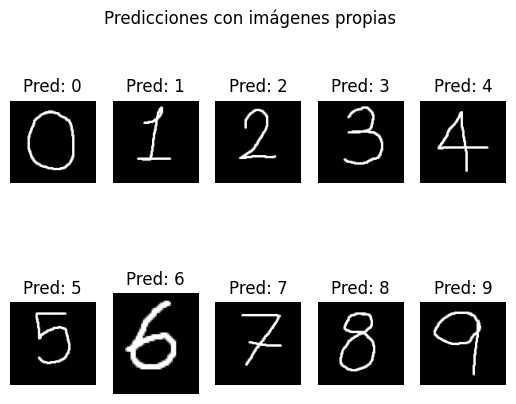

In [38]:
# === PASO 3: Predicciones con imágenes propias ===

# Función para procesar una imagen externa
def preprocess_own_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Invertir si fondo blanco
    if np.mean(img) > 127:
        img = 255 - img

    # Umbral para binarizar
    _, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Buscar contornos
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        # Obtener el contorno más grande
        c = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(c)
        digit = img[y:y+h, x:x+w]
    else:
        digit = img

    # Redimensionar a 20x20
    digit = cv2.resize(digit, (20, 20), interpolation=cv2.INTER_AREA)

    # Insertar en canvas 28x28 centrado
    canvas = np.zeros((28, 28), dtype=np.uint8)
    x_offset = (28 - 20) // 2
    y_offset = (28 - 20) // 2
    canvas[y_offset:y_offset+20, x_offset:x_offset+20] = digit

    # Normalizar
    canvas = canvas.astype("float32") / 255.0
    canvas = canvas.reshape(1, 28, 28, 1)
    return canvas


# Lista explícita de tus archivos reales (ya renombrados correctamente)
own_images = [f"{i}.jpg" for i in range(10)]
own_folder = "own_digits"

for i, filename in enumerate(own_images):
    path = os.path.join(own_folder, filename)
    img_processed = preprocess_own_image(path)
    prediction = model.predict(img_processed, verbose=0)
    predicted_label = np.argmax(prediction)

    plt.subplot(2, 5, i + 1)
    img_show = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_show, cmap='gray')
    plt.title(f'Pred: {predicted_label}')
    plt.axis('off')

plt.suptitle("Predicciones con imágenes propias")
plt.show()


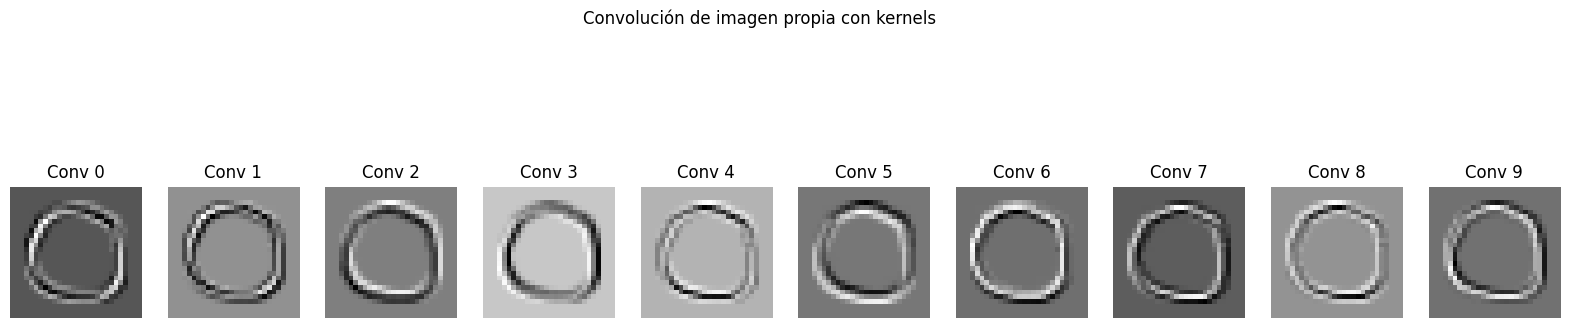

In [39]:
# === PASO 4: Aplicar convolución a una imagen propia ===
own_example = preprocess_own_image(os.path.join(own_folder, own_images[0]))
fig, axes = plt.subplots(1, 10, figsize=(20, 5))
for i in range(10):
    kernel = kernels[:, :, 0, i]
    output = cv2.filter2D(own_example[0, :, :, 0], -1, kernel)
    axes[i].imshow(output, cmap='gray')
    axes[i].set_title(f'Conv {i}')
    axes[i].axis('off')
plt.suptitle("Convolución de imagen propia con kernels")
plt.show()